In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import spacy
from nltk.corpus import reuters
from spacy import displacy

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [79]:
# Fetch the Bitcoin news articles
bitcoin=newsapi.get_everything(q="bitcoin", language="en")

In [6]:
# Fetch the Ethereum news articles
ethereum=newsapi.get_everything(q="ethereum", language="en")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = [ "compound", "positive", "negative", "neutral","text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df=bitcoin_df[:12]
bitcoin_df.drop(index=9,axis=0,inplace=True)
bitcoin_df.tail(10)



,compound,positive,negative,neutral,text
1,0.0000,0.000,0.000,1.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
2,0.0000,0.000,0.000,1.000,Over the last few weeks all eyes in the crypto...
3,-0.3464,0.046,0.134,0.819,If youre planning to do some protesting and yo...
4,-0.2755,0.000,0.070,0.930,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
5,0.0000,0.000,0.000,1.000,<ul><li>Famed investor Michael Novogratz tweet...
6,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...
7,0.8016,0.188,0.000,0.812,The move is the latest in a string of positive...
8,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...
10,0.0000,0.000,0.000,1.000,Bitcoin has always had the potential to become...
11,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
# Reorder DataFrame columns

cols = [ "compound", "positive", "negative", "neutral","text"]
ethereum_df = ethereum_df[cols]
ethereum_df.drop(index=[10,11],axis=0,inplace=True)
ethereum_df


,compound,positive,negative,neutral,text
0,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...
1,0.0000,0.000,0.000,1.000,Editors note:Andreessen Horowitzs Crypto Start...
2,0.0000,0.000,0.000,1.000,For developers looking to quickly build identi...
3,0.6249,0.141,0.000,0.859,Use this to send Ether from one account to ano...
4,-0.4457,0.031,0.086,0.882,"Some open-source groups, such as The Linux Fou..."
5,0.0000,0.000,0.000,1.000,Over the last few weeks all eyes in the crypto...
6,0.3400,0.089,0.050,0.861,Imagine sending $133 to a friend and being cha...
7,0.5719,0.115,0.000,0.885,We have been looking for ways in which crypto ...
8,0.2732,0.057,0.000,0.943,"Back in March, we put out our call for ideas t..."
9,-0.6705,0.000,0.143,0.857,"Intel announced CrossTalk, a new side-channel ..."


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,11.000000,11.000000,11.000000,11.000000
mean,0.224155,0.061364,0.018545,0.920000
std,0.405232,0.070413,0.043672,0.074931
min,-0.346400,0.000000,0.000000,0.812000
25%,0.000000,0.000000,0.000000,0.869500
50%,0.000000,0.046000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,1.000000
max,0.801600,0.188000,0.134000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,15.000000,15.000000,15.000000,15.000000
mean,0.144373,0.064467,0.023800,0.911600
std,0.424461,0.088429,0.044667,0.089557
min,-0.670500,0.000000,0.000000,0.665000
25%,0.000000,0.000000,0.000000,0.870000
50%,0.000000,0.042000,0.000000,0.910000
75%,0.423500,0.089500,0.025000,1.000000
max,0.919800,0.335000,0.143000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ethereum with 0.064467

Q: Which coin had the highest compound score?

A: bitcoin with 0.224155

Q. Which coin had the highest positive score?

A: ethereum with 0.335

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary


In [54]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    sw = set(stopwords.words('english'))
    sw_addons ={'every','another','fucking','char','even'}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    lem = [lemmatizer.lemmatize(word) for word in output]
    return lem



In [55]:
# Create a new tokens column for bitcoin
l=[]
for i in bitcoin_df['text']:
    l.append(tokenizer(i))
bitcoin_df['tokens']=l       
bitcoin_df.head()


,compound,positive,negative,neutral,text,tokens
0,0.7650,0.171,0.000,0.829,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, drinking, lot, youd, better, bel..."
1,0.0000,0.000,0.000,1.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
2,0.0000,0.000,0.000,1.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."
3,-0.3464,0.046,0.134,0.819,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
4,-0.2755,0.000,0.070,0.930,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."


In [56]:
# Create a new tokens column for ethereum
l=[]
for i in ethereum_df['text']:
    l.append(tokenizer(i))
ethereum_df['tokens']=l       
ethereum_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.0000,0.000,0.000,1.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, noteandreessen, horowitz, crypto, sta..."
2,0.0000,0.000,0.000,1.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
3,0.6249,0.141,0.000,0.859,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, smart, contra..."
4,-0.4457,0.031,0.086,0.882,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [57]:
from collections import Counter
from nltk import ngrams

In [58]:
# Generate the Bitcoin N-grams w
all_bitcoin_tokens=[]
for i in bitcoin_df['tokens']:
    all_bitcoin_tokens=all_bitcoin_tokens+i
bigrams_bitcoin=Counter(ngrams(all_bitcoin_tokens, n=2))
print(dict(bigrams_bitcoin.most_common(10)))

{('satoshi', 'nakaboto'): 6, ('char', 'robot'): 3, ('robot', 'colleague'): 3, ('colleague', 'satoshi'): 3, ('nakaboto', 'writes'): 3, ('writes', 'bitcoin'): 3, ('daywelcome', 'edition'): 3, ('edition', 'bitcoin'): 3, ('bitcoin', 'today'): 3, ('today', 'satoshi'): 3}


In [59]:
# Generate the Ethereum N-grams where N=2
all_ethereum_tokens=[]
for i in ethereum_df['tokens']:
    all_ethereum_tokens=all_ethereum_tokens+i
bigrams_ethereum=Counter(ngrams(all_ethereum_tokens, n=2))
print(dict(bigrams_ethereum.most_common(10)))

{('satoshi', 'nakaboto'): 2, ('open', 'source'): 2, ('char', 'opinion'): 2, ('opinion', 'expressed'): 2, ('expressed', 'entrepreneur'): 2, ('entrepreneur', 'contributor'): 2, ('robot', 'colleague'): 1, ('colleague', 'satoshi'): 1, ('nakaboto', 'writes'): 1, ('writes', 'bitcoin'): 1}


In [60]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [61]:
# Get the top 10 words for Bitcoin

token_count(all_bitcoin_tokens)

[('bitcoin', 15),
 ('char', 11),
 ('satoshi', 6),
 ('nakaboto', 6),
 ('robot', 3),
 ('colleague', 3),
 ('writes', 3),
 ('daywelcome', 3),
 ('edition', 3),
 ('today', 3)]

In [62]:
# Get the top 10 words for Ethereum
token_count(all_ethereum_tokens)

[('char', 15),
 ('bitcoin', 7),
 ('crypto', 5),
 ('blockchain', 4),
 ('transaction', 3),
 ('satoshi', 2),
 ('nakaboto', 2),
 ('build', 2),
 ('looking', 2),
 ('available', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

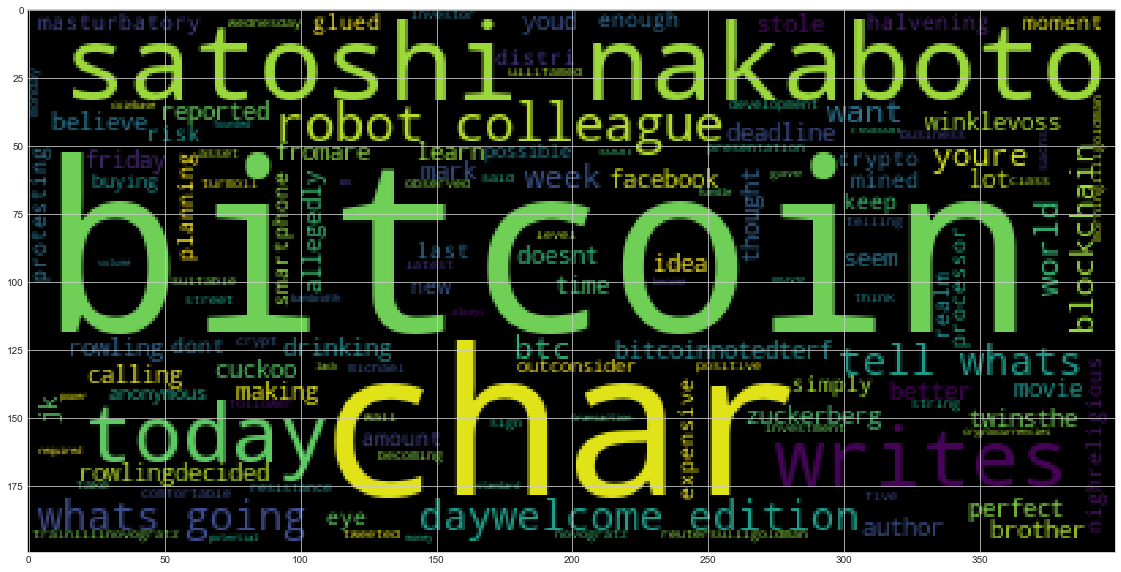

In [64]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(all_bitcoin_tokens))
plt.imshow(wc) 


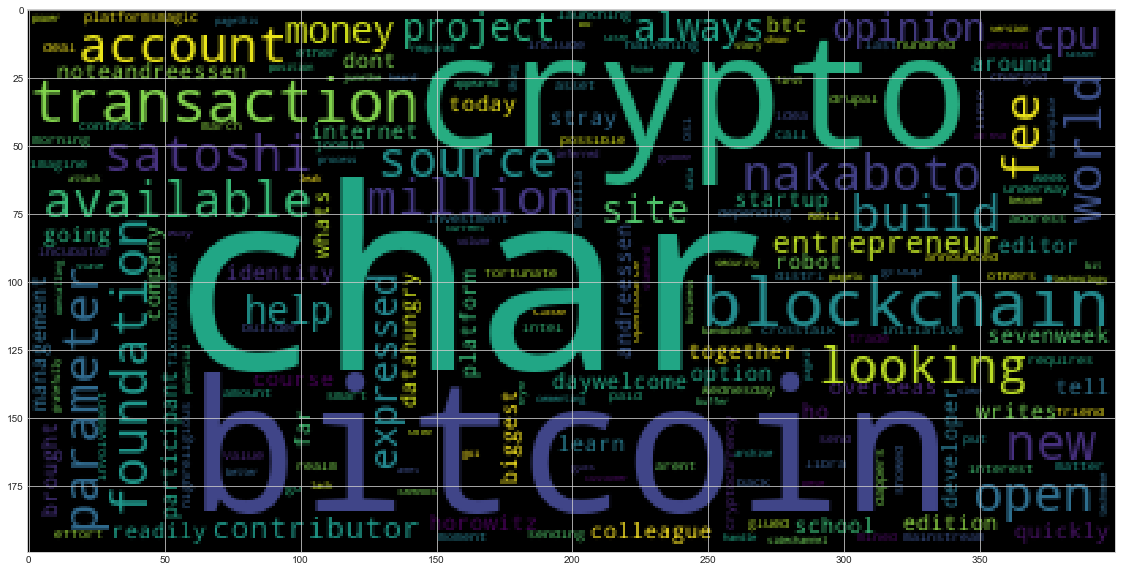

In [65]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(all_ethereum_tokens))
plt.imshow(wc) 


# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [66]:
import spacy
from spacy import displacy

In [67]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [68]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [69]:
# Concatenate all of the bitcoin text together
all_bitcoin=[]
for i in bitcoin_df['text']:
    all_bitcoin.append(i)
all_bitcoin = "".join(all_bitcoin)
all_bitcoin

'J.K. Rowling has been drinking a lot and you\'d better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm. Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars]If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars]Reuters\r\n<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentati

In [70]:
# Run the NER processor on all of the text


# Add a title to the document

In [71]:
# Render the visualization
nlp = spacy.load("en_core_web_sm")
doc = nlp(all_bitcoin)
displacy.render(doc, style='ent')

In [72]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

J.K. Rowling PERSON
Bitcoin GPE
The Cuckoos Calling WORK_OF_ART
Friday DATE
chars]The Winklevoss ORG
Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
2012 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE


---

## Ethereum NER

In [73]:
# Concatenate all of the bitcoin text together
all_ethereum=[]
for i in ethereum_df['text']:
    all_ethereum.append(i)
all_ethereum = "".join(all_ethereum)
all_ethereum

'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars]Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars]Use this to send Ether from one account to another or a smart contract address. It requires a few parameters depending on the transaction. Possible parameters include from, to, value, gas, and more.\r… [+206 chars]Some open-source groups, such as The Linux Foundation, can deal with it. Others aren\'t so fortunate. Some, such as Drupal Foundation, the 

In [74]:
# Run the NER processor on all of the text

# Add a title to the document

In [75]:
# Render the visualization
nlp = spacy.load("en_core_web_sm")
doc = nlp(all_ethereum)
displacy.render(doc, style='ent')


In [76]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Andreessen Horowitzs Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
CrossTalk ORG
This Page
 WORK_OF_ART
Techmeme ORG
1:25 TIME
June 13 DATE
2020 DATE
Bitcoin PERSON
first ORDINAL
blockchain GPE
2020 DATE
a big year DATE
Bitcoin GPE
